In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('green_tech_data.csv')
print(data.head())
print(data.info())

print(data.isnull().sum())
data.fillna(data.mean(), inplace=True)

   carbon_emissions  energy_output  ...  cost_efficiency  sustainability
0        181.089042     128.286267  ...         0.732568               1
1        382.750007     672.769370  ...         2.891096               0
2        306.197880     382.920383  ...         2.932858               0
3        259.530469     557.713622  ...         3.368435               0
4        104.606524     916.809827  ...         3.767411               0

[5 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   carbon_emissions    100 non-null    float64
 1   energy_output       100 non-null    float64
 2   renewability_index  100 non-null    float64
 3   cost_efficiency     100 non-null    float64
 4   sustainability      100 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.0 KB
None
carbon_emissions      0
energy_output  

In [9]:
data

carbon_emissions  energy_output  ...  cost_efficiency  sustainability
0         181.089042     128.286267  ...         0.732568               1
1         382.750007     672.769370  ...         2.891096               0
2         306.197880     382.920383  ...         2.932858               0
3         259.530469     557.713622  ...         3.368435               0
4         104.606524     916.809827  ...         3.767411               0
..               ...            ...  ...              ...             ...
95        222.828459     414.288617  ...         4.688408               0
96        232.956490     753.360111  ...         4.362857               0
97        199.639356     907.399234  ...         2.430473               0
98         58.896694     898.377782  ...         3.878920               0
99         87.761999     801.887991  ...         3.895443               0

[100 rows x 5 columns]

In [10]:
X = data[['carbon_emissions', 'energy_output', 'renewability_index', 'cost_efficiency']]
y = data['sustainability']

In [11]:
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
#classification model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [15]:
#make predictions
y_pred = model.predict(X_test)

In [16]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [27]:
#evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.95


In [21]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.67      0.80         3

    accuracy                           0.95        20
   macro avg       0.97      0.83      0.89        20
weighted avg       0.95      0.95      0.95        20



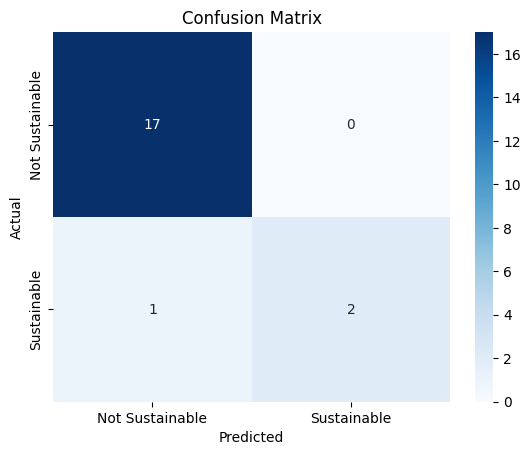

In [31]:
#visualize the results
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Sustainable', 'Sustainable'],
            yticklabels=['Not Sustainable', 'Sustainable'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()